# Chapter 2 – 一个端到端的机器学习项目

在本章中，我们将通过端到端地完成一个示例项目来说明机器学习项目的主要步骤： 

- 了解问题的背景；
- 获取数据；
- 探索数据和可视化；
- 为机器学习算法准备数据；
- 选择模型并进行训练；
- 模型调优；
- 提出你的解决方案。


本章节的示例项目要求Python 3.7或以上版本， Scikit-Learn 1.0.1或以上版本

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
sys.version_info

sys.version_info(major=3, minor=10, micro=9, releaselevel='final', serial=0)

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
version.parse(sklearn.__version__)

<Version('1.2.1')>

# 1. 了解问题的背景

- <font color=Blue>了解问题的背景；</font>
- 获取数据；
- 探索数据和可视化；
- 为机器学习算法准备数据；
- 选择模型并进行训练；
- 模型调优；
- 提出你的解决方案。

假设你是地产公司的一位数据科学家。现在你有一个项目是利用加利福尼亚州的人口普查数据建立一个该州的住房价格模型。

- 一个样本点代表一个街区组（block group）；
- 预测变量（predictor, feature,variable,input）：人口、收入中位数、经度、纬度等普查数据中记录的变量；
- 响应变量（response, target）：街区组内住房价格中位数。 

现在你需要利用人口普查数据中训练一个模型，该模型能用人口普查数据中的变量**预测任何街区组内的房价中位数。**

对于这个任务，我们可以在了解问题背景时完成一下几件事：

- 确定这个问题的目标；
- 选择合理的指标来衡量模型性能；
- 检查这个问题的假设条件。

## 确定问题的目标

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - 选择合理的指标来衡量模型性能；
  - 检查这个问题的假设条件。
- 获取数据；
- 探索数据和可视化；
- 为机器学习算法准备数据；
- 选择模型并进行训练；
- 模型调优；
- 提出你的解决方案。

**Q1.** 训练一个模型不是最终目标。所以，这个问题的最终目标是什么？

**Answer.** 模型的输出结果（对某一地区房价中位数的预测）将与许多其他信号一起输入另一个机器学习系统。这个下游系统将决定是否值得在某个地区投资。

**Remark.** 业务线上游提供数据，业务线下游需求是对于街区组内房价的预测。这里你的项目不是一个独立的项目，需要考虑到业务线上下游的情况。

![downstream](./CH2-figures/fig2.png)

**Q2.** 公司里目前的解决方案是怎样的？（Baseline）

**Answer.** 目前，各区房价是由专家手工估算的：一个小组负责收集各区的最新信息，当他们无法获得房价中位数时，就会利用复杂的规则进行估算。

**Remark.** Baseline方法为你提供了一个参考表现，使你了解你的模型需要达到什么业务指标：

- 人力成本高，贵；
- 效率低，时间成本高；
- 准确率低；

现在，你对任务的目标和背景有了初步了解：

- 有监督的学习：人口普查数据中提供了房价中位数；
- 回归任务：目标变量(房价中位数)是一个连续变量；
- 离线学习： 目前为止，并没有提到需要高频率的更新模型的需求。

## 选择一个模型性能的衡量标准

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - 检查这个问题的假设条件。
- 获取数据；
- 探索数据和可视化；
- 为机器学习算法准备数据；
- 选择一个模型并进行训练；
- 你的模型进行调优；
- 提出你的解决方案。

下一步是选择模型性能的衡量指标 or 损失函数。

1. 在回归问题中，一个典型的性能指标(或损失函数)是**RMSE (Root Mean Square Error)**：
$\text{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^m \big(h(x_{i})-y_i\big)^{2}}.$

2. 如果有很多离群点(大的error)，您可以考虑使用 ** MAE (Mean Absolute Error)**：
$\text{MAE} = \frac{1}{m} \sum_{i=1}^m \Big| h(x_{i})-y_i \Big|.$

**Remark.** 如果把预测结果和目标值写成向量形式： $\mathbf{h} = [h(x_{1}),\cdots, h(x_{m})]$和$\mathbf{y} = [y_{1},\cdots, y_{m}]$, RMSE和MAE分别是这两个向量的$\ell_2$和$\ell_1$范数。推广：可以使用多种距离度量或规范：$\ell_0$、$\ell_k$、$\ell_\infty$ 范数。

## 检查问题的假设条件

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- 获取数据；
- 探索数据和可视化；
- 为机器学习算法准备数据；
- 选择一个模型并进行训练；
- 你的模型进行调优；
- 提出你的解决方案。

列出并验证迄今为止（由你或其他人）所做的假设；这有助于您及早发现严重问题。

比如：下游模型的输入要求是分类变量，对房价进行分级。

# 2 获取数据

- <font color=Blue>了解问题的背景；</font>
- <font color=Blue>获取数据；</font>
- 探索数据和可视化；
- 为机器学习算法准备数据；
- 选择一个模型并进行训练；
- 你的模型进行调优；
- 提出你的解决方案。

获取数据的途径：

- 从公司的数据库中下载；
- 从公开资源收集，比如爬虫在论坛收集网友评论；
- 离线文件，存在内部电脑上的数据文件
- 等。。。。。。

本小节的安排：

1. 我们先看一个下载数据的函数。
2. 描述性统计工作，浏览数据结构。
3. 切分数据集。***这么早切分数据？***




## 下载数据

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - 快速浏览数据结构；
  - 创建测试集
- 探索数据和可视化；
- 为机器学习算法准备数据；
- 选择一个模型并进行训练；
- 你的模型进行调优；
- 提出你的解决方案。

- 如果数据经常变化，你可以编写一个小脚本，自动获取最新数据。
- 如果需要在多台机器上安装数据集，自动获取数据的过程也很有用。
- 从研究角度，便于其他研究人员复现你的结果。
- 因此，与其手动下载和解压数据，通常不如编写一个函数来代劳。

下面是一个下载并加载数据的函数，是我们该课程中的第一段函数。我们详细检查每一句的内容：

In [5]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    # tarball: 压缩包  Path：路径
    if not tarball_path.is_file():
    #  寻找压缩包文件 datasets/housing,tgz
    #  如果没有找到，执行下边的code
        Path("datasets").mkdir(parents=True, exist_ok=True)
        # 创建一个目录 datasets
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        # 下载 housing.tgz 
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
            # 打开压缩包，并把压缩包里的文件解压到目录datasets下
    return pd.read_csv(Path("datasets/housing/housing.csv"))
    # 读取解压后的文件

housing = load_housing_data()

In [6]:
pwd

'C:\\Users\\clxie\\Desktop\\Statistical Learning\\Chapter2'

`Path.is_file()`: return True if the path points to a regular file, False if it points to another kind of file. False is also returned if the path doesn't exist. (https://docs.python.org/3/library/pathlib.html#pathlib.Path.is_file)

`Path.mkdir()`: create a new directory at this given path.(https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir)

`urllib.request.urlretrieve()`: copy a network object denoted by a URL to a local file.(https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve)

`tarfile.open()`: return a TarFile object for the pathname name.
(https://docs.python.org/3/library/tarfile.html#tarfile.open)


`TarFile.extractall()`: Extract all members from the archive to the current working directory or directory path. 
(https://docs.python.org/3/library/tarfile.html#tarfile.TarFile.extractall)


## 快速浏览数据结构

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - 创建测试集
- 探索数据和可视化；
- 为机器学习算法准备数据；
- 选择一个模型并进行训练；
- 你的模型进行调优；
- 提出你的解决方案。

下载了数据后，可以快速浏览数据，进行一些描述性统计分析。这些结果使你初步了解数据，有多少样本、有哪些变量、缺失多少。

`pandas.DataFrame.head` Return the first n rows. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)  
`pandas.DataFrame.info` Print a concise summary of a DataFrame. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)
`pandas.DataFrame.describe` Generate descriptive statistics. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [7]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

- 9个输入变量：longitude, latitude, housing_median_age，total_rooms，total_bedrooms，population，households，median_income，and ocean_proximity。 1个目标变量：median_house_value。并且大致了解了各个变量的类型和取值范围。

- 样本量20640，这个样本量对于机器学习任务来说是个小规模数据，并且该数据内存占用1.6+M，很小。Batch Learning足够用。

- total_bedrooms变量有20433个非空值，说明有207个缺失值。在清理数据时需要考虑是否删除207个有缺失值的样本，或者填充缺失值。

- 所有变量都是数值型的，除了ocean_proximity。
- 它的类型是 object，所以它可以容纳任何类型的Python object。
- 但数据是从CSV文件中加载的，所以它必须是文本属性。
- 观察前五行时（DataFrame.head()）， ocean_proximity变量展示的值是重复的，因此猜测它可能是一个分类属性。
- 我们可以找出存在哪些类别以及每个类别下有多少个样本点：

In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
# save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

在描述性统计分析中，另一种快速了解数据的方法是为每个数值型变量绘制直方图。直方图显示具有给定值范围（横轴）的样本点数量（纵轴）。

`pandas.DataFrame.hist()` Make a histogram of the DataFrame’s columns. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

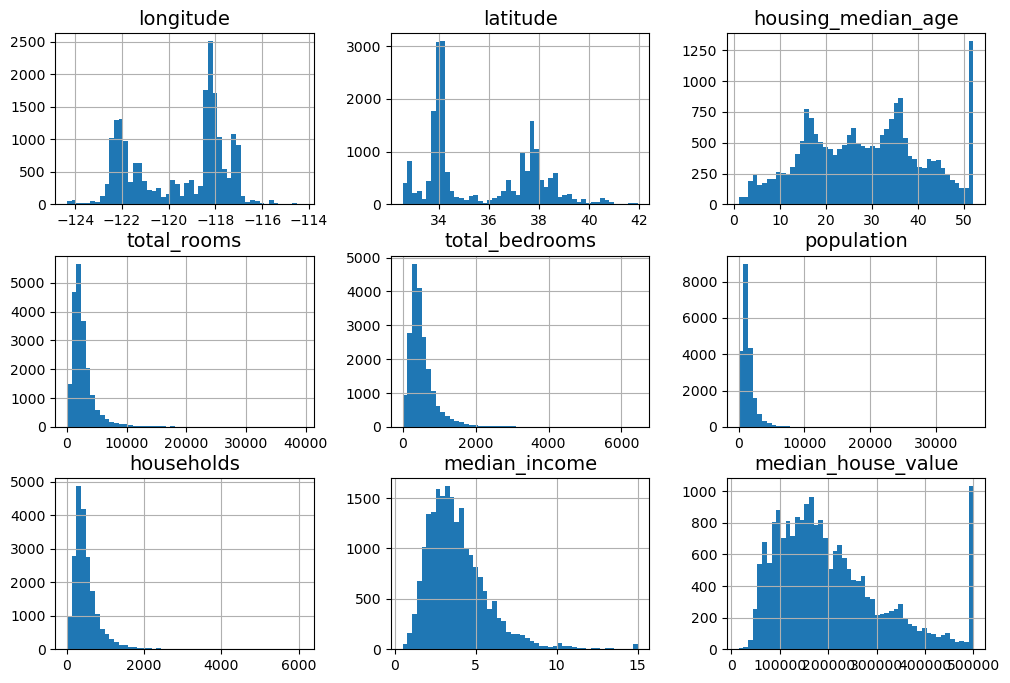

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

观察这些直方图可以发现一些问题：

------
- 首先，median_income 的单位不是美元。如果不清楚单位，需要向收集数据的团队核实。
- median_income的数值已经进行了缩放，上限时15，下限为0.5. 分别表示15W美元和0.5W美元。
- 在机器学习中预处理数据是非常常见的，这并不一定是个问题。但您应该尽量理解这些数据的涵义，必要时与前端业务线进行沟通。
------
- housing_median_age 和 median_house_value 都是有上限的。
- median_house_value 是目标变量(target,label)，在训练集中目标变量有上限可能是个问题：从数据中学习到的模型给出的预测值永远不会超过该上限。
- 需要与业务线下游团队确认这个上限是否构成问题。
- 如果对某些街区组需要精确预测其房屋价格中位数并且会超过50W，可以考虑的解决方案：
  - 对median_house_value被封顶的地区收集确切的数值；
  - 将median_house_value被封顶的地区从数据中删除，再重新切分训练集和测试集。（可能存在风险）
------
- 这些数值变量的分布范围非常不同。我们将在稍后讨论标准化和归一化的方法。
- 分布的特征：单峰 or 多峰， 左偏 or 右偏。

## 创建测试集

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- 探索数据和可视化；
- 为机器学习算法准备数据；
- 选择一个模型并进行训练；
- 你的模型进行调优；
- 提出你的解决方案。

在这个阶段主动隐藏部分数据，避免过度拟合：

- 如果你查看测试集，你可能会在测试数据中发现一些看似有趣的模式，从而选择一种特定的机器学习模型。
- 这种情况下当你使用测试集来估计泛化误差时，你的估计会过于乐观，从而导致系统上线运行后性能不如预期。
- 同一类型的错误：根据模型在测试集上的表现进行超参数的调优。

这就是所谓的**数据窥探偏差**。

所以要提前切分出一段测试样本，保证你在模型训练和超参调优的过程中都没有用过测试集的数据，以得出泛化误差的可靠估计。

创建测试集的原理非常简单，随机抽取一部分数据（比如20%）放到一边：

In [13]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    # 先把数据集中的样本顺序打乱，这样有什么好处？
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

`pandas.DataFrame.iloc` Purely integer-location based indexing for selection by position. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas-dataframe-iloc)

In [14]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [15]:
len(test_set)

4128

问题：每次执行这段切分数据集的程序，得到的测试集都是不同的。怎么重复你的研究结果呢？

使用固定的随机数种子。

In [16]:
np.random.seed(42)

你也可以使用Scikit-Learn中的`train_test_split()`来执行训练集和测试集的切分：

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

到目前为止，你已经可以通过简单随机抽样来获得测试集了。一般来说，如果数据集足够大，切分出来的测试集是有不错的代表性的。但如果数据集的数量不够大，就有可能引入明显的 抽样偏差。

**例.** 当调查公司的员工决定打电话给1000个人询问几个问题时，他们不会只是在电话簿中随机挑选1000人。就他们想问的问题而言，他们会努力确保这 1000 人的答案是有代表性的，可以反应整个群体的情况。如果人群中女性占51.1%，男性占 48.9%，在进行的调查应尽量在样本中也保持这一比例。最理想的状态是抽取到的样本包含 511名女性和 489名男性。

***分层抽样***： 将群体划分为同质的子群体，称为分层，并从每个分层中抽取适当数量的样本以保证测试集能代表整个群体。

**例.** 如果我们认为抽样的样本中女性比例低于48.5%或者高于53.5%为抽样偏差较大的样本，这种情况发生的概率大于10.7%。

如何计算得出的10.7%的概率？
- 数学思维：
- 工程思维：

In [18]:
# 直接计算概率：

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929909


In [19]:
# 模拟10万次

import numpy as np

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

假设收入中位数是预测房价中位数的一个非常重要的变量。你可能想确保测试集能够代表整个数据集中的各类收入。
数据集。由于收入中位数是一个连续的数字属性，因此您首先需要创建一个收入类别属性。

In [20]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

让我们画出收入中位数的直方图并仔细地观察一下：

大多数收入中位数值都集中在
1.5-6（即 15,000 美元-60,000 美元），但有些收入中位数远远超过 6。因此
在数据集中为每个阶层提供足够数量的实例非常重要、
否则，对分层重要性的估计可能会有偏差

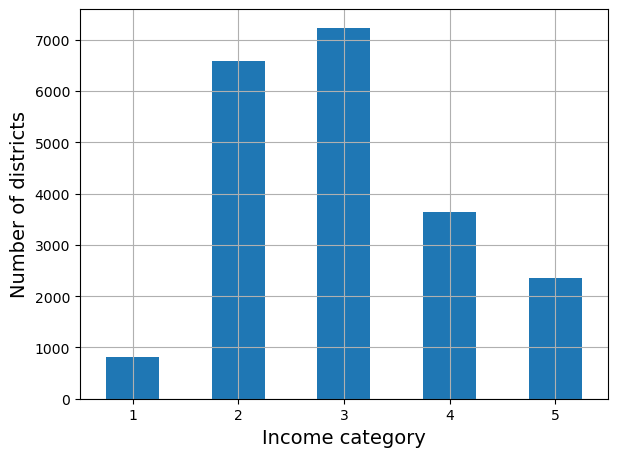

In [21]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
save_fig("housing_income_cat_bar_plot") 
plt.show()

Do stratified sampling based on the income category:

- (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)
- (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

`pandas.DataFrame.iloc` Purely integer-location based indexing for selection by position. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

需要留意的地方：这里n_splits是什么？输出的数据切分结果是什么形式？

In [23]:
strat_train_set, strat_test_set = strat_splits[0]

In [24]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [25]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

下面我们通过一个模拟实验来比较整个数据集中的收入类别比例、分层抽样生成的测试集中的收入类别比例以及纯随机抽样生成的测试集中的收入类别比例。可以看到，使用分层抽样生成的测试集的收入类别比例与整个数据集中的收入类别比例几乎相同，而使用纯随机抽样生成的测试集则出现了偏差。

In [26]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [27]:
compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

Overall %  Stratified %  Random %  Strat. Error %  \
Income Category                                                      
1                     3.98          4.00      4.24            0.36   
2                    31.88         31.88     30.74           -0.02   
3                    35.06         35.05     34.52           -0.01   
4                    17.63         17.64     18.41            0.03   
5                    11.44         11.43     12.09           -0.08   

                 Rand. Error %  
Income Category                 
1                         6.45  
2                        -3.59  
3                        -1.53  
4                         4.42  
5                         5.63

In [28]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 3. 探索数据和可视化

- <font color=Blue>了解问题的背景；</font>
- <font color=Blue>获取数据；</font>
- <font color=Blue>探索数据和可视化；</font>
- 为机器学习算法准备数据；
- 选择一个模型并进行训练；
- 你的模型进行调优；
- 提出你的解决方案。

到目前为止，你已经快速浏览了一下数据，对你正在处理的数据类型和数据的质量有了大致的了解。现在，我们的目标是更深入地了解数据，并且再做分析报告时也需要一些对于数据的直观总结。在开始之前，我们需要确定：

- 请确保测试集已经放在一边，而你只是在探索训练集。
- 确认训练集的大小。如果训练集非常大，您可能需要采样探索数据集。
 
 
在这种情况下，训练集很小（整个数据集很小），所以你可以直接在训练集上开始探索工作。因为你要由于要对训练集进行各种转换，所以复制一份原始数据可以帮助你在之后恢复数据：

In [29]:
housing = strat_train_set.copy()

## 将地理数据可视化

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - 检查变量之间的相关性；
  - 尝试通过变量组合构造新的变量；
- 为机器学习算法准备数据；
- 选择一个模型并进行训练；
- 你的模型进行调优；
- 提出你的解决方案。

这是一个回归任务并且变量中包含了位置信息(经度、纬度)，我们可以根据数据的位置信息画出散点图：

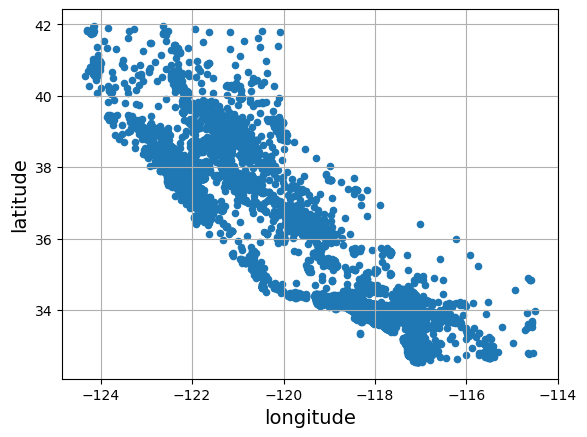

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

从散点图上我们可以看出加州的轮廓。但是这幅图给人的观感不是很好，很难从中看到什么信息，只是对样本点分布的一个展示。将alpha选项设置为 0.2 (范围0-1)，可以更容易地显示数据点密度高的地方：

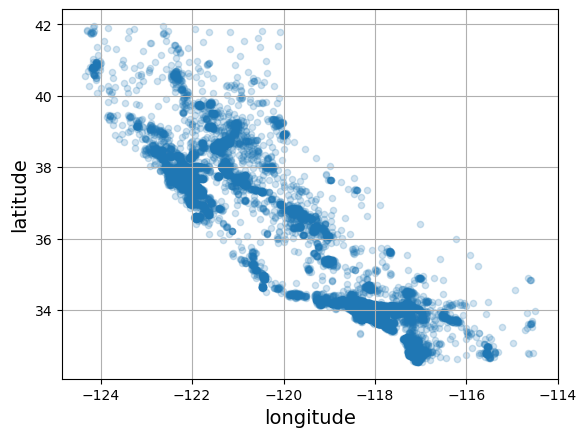

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

`pandas.DataFrame.plot` Make plots of Series or DataFrame. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

现在你可以清楚地看到高密度地区，图片中展示出了清楚的规律。但您可能需要一些色彩和形状的变化来突出这些规律。

我们对图片进行一些修饰：
用每个圆的半径代表该地区的人口（选项 `s`），颜色代表价格（选项 `c`）。这里使用的是预定义的颜色图（选项 `cmap` ），名为 `jet` ，范围从蓝色（低价）到红色（高价）：

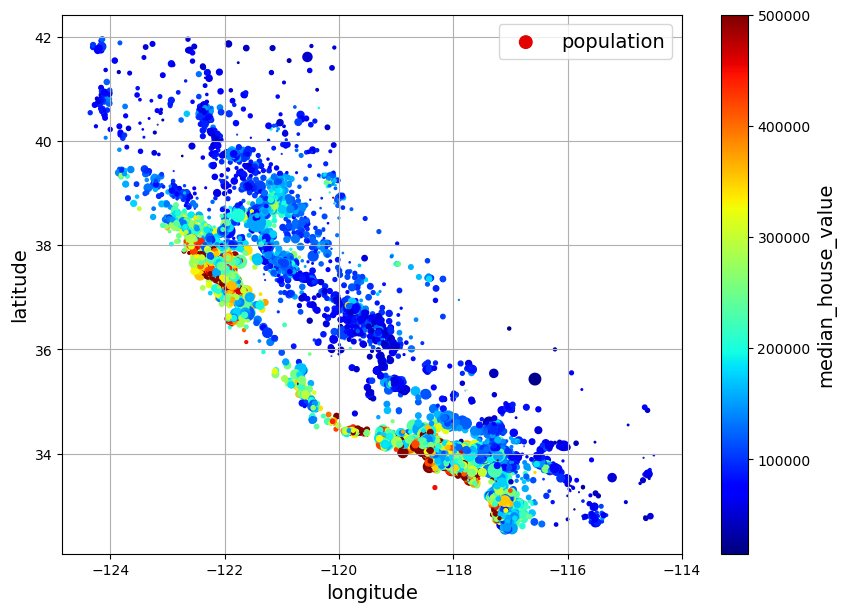

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

The next cell generates a beautified version of the previous figure, with an image of California added in the background, nicer label names and no grid.

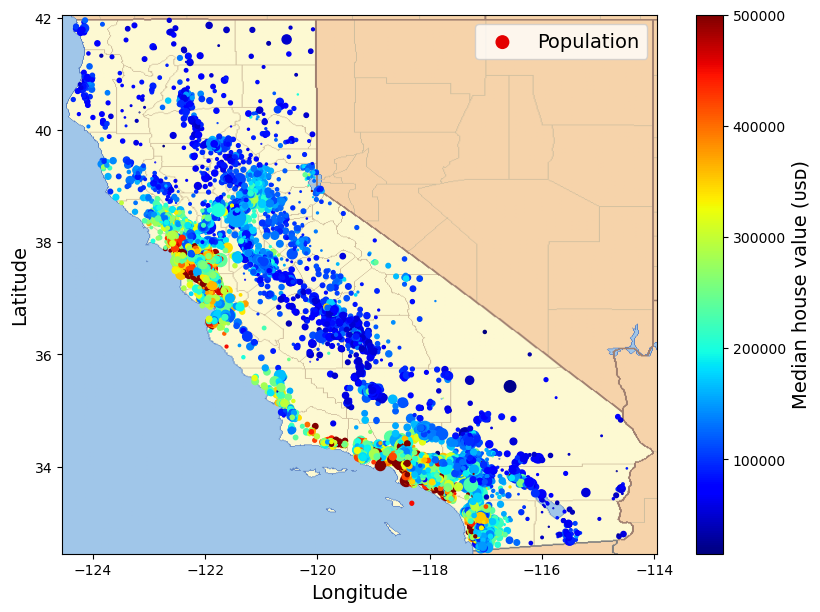

In [33]:
# # Download the California image
# filename = "california.png"
# if not (IMAGES_PATH / filename).is_file():
#     homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
#     url = homl3_root + "images/end_to_end_project/" + filename
#     print("Downloading", filename)
#     urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread("california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

plt.show()

从这张图片中，我们可以发现房价与地理位置（如靠近海洋）和人口密度有很大关系。根据这个理解我们可以构造新的特征：
- 使用聚类算法来推断主要的人口聚集中心；
- 计算样本点到聚类中心的距离。

## 检查变量之间的相关性

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - <font color=Blue>检查变量之间的相关性；</font>
  - 尝试通过变量组合构造新的变量；
- 为机器学习算法准备数据；
- 选择一个模型并进行训练；
- 你的模型进行调优；
- 提出你的解决方案。

检查线性相关系数：

一共有9个数值型变量，我们可以算出9*9的相关系数矩阵 

`pandas.DataFrame.corr` Compute pairwise correlation of columns, excluding NA/null values. (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [34]:
corr_matrix = housing.corr()

C:\Users\clxie\AppData\Local\Temp\ipykernel_19764\2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [35]:
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924213           -0.102937     0.044558   
latitude            -0.924213  1.000000            0.005692    -0.036753   
housing_median_age  -0.102937  0.005692            1.000000    -0.361710   
total_rooms          0.044558 -0.036753           -0.361710     1.000000   
total_bedrooms       0.068210 -0.066391           -0.317978     0.930076   
population           0.104236 -0.115677           -0.301906     0.863967   
households           0.054261 -0.071604           -0.300075     0.916143   
median_income       -0.016542 -0.078137           -0.127043     0.197720   
median_house_value  -0.050859 -0.139584            0.102175     0.137455   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068210    0.104236    0.054261      -0.016542   
latitude                 -0.066391   -0.115677   -0.071604      -0.078137   
housing_median_age       -0.317978   -0.301906   -0.300075      -0.127043   
total_rooms               0.930076    0.863967    0.916143       0.197720   
total_bedrooms            1.000000    0.886200    0.978822      -0.006038   
population                0.886200    1.000000    0.916237       0.004282   
households                0.978822    0.916237    1.000000       0.013637   
median_income            -0.006038    0.004282    0.013637       1.000000   
median_house_value        0.054635   -0.020153    0.071426       0.688380   

                    median_house_value  
longitude                    -0.050859  
latitude                     -0.139584  
housing_median_age            0.102175  
total_rooms                   0.137455  
total_bedrooms                0.054635  
population                   -0.020153  
households                    0.071426  
median_income                 0.688380  
median_house_value            1.000000

In [36]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

检查各个变量之间相关性的另一种方法是使用Pandas的 `scatter_matrix()` 函数，它将每个数值型变量对其他数值型变量的散点图绘制出来。

如果将每个数值变量与自己相对应，主对角线上就会出现很多直线，这样不提供信息。因此在散点图矩阵的对角线位置会提供每个数值变量的直方图。

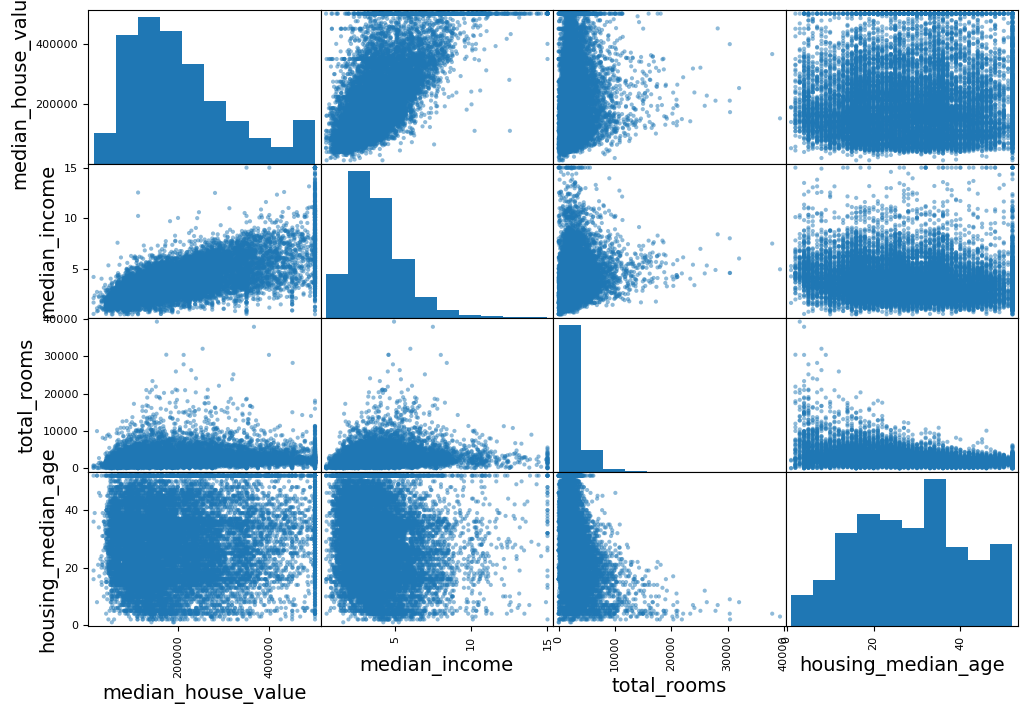

In [37]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

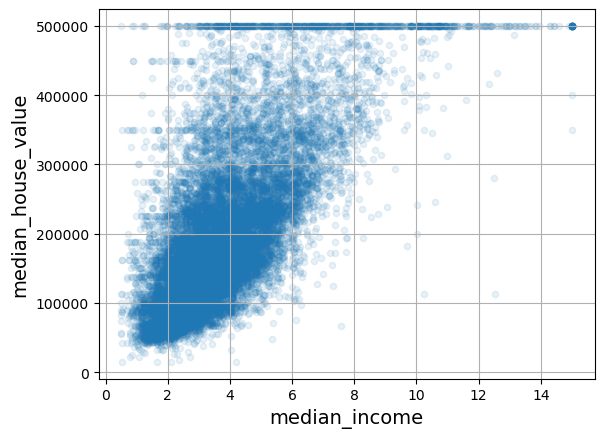

In [38]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

- 街区组内的房价中位数和收入中位数的相关性很强。可以清楚地看到上升趋势，而且各点并不太分散。
- 价格上限清晰可见，即 500K 的水平线。
- 在价格上限之下，还有几条水平线： 450K、350K等（可以考虑删除一些样本）

The correlation coefficient only measures linear correlations. It may completely miss out on nonlinear relationships.

The following figure shows a variety of datasets along with their correlation coefficient. Note how all the plots of the bottom row have a correlation coefficient equal to 0, despite the fact that their axes are clearly not independent: these are examples of nonlinear relationships. Also, the second row shows examples where the correlation coefficient is equal to 1 or -1; notice that this has nothing to do with the slope.

相关系数只能度量线性相关关系，可能无法检测出非线性关系。

下图显示了各种数据集及其相关系数。
- 第一行展示了线性相关和线性无关的比较。
- 第二行显示的是相关系数等于 1 或-1 的情况，相关性的大小与斜率无关。
- 第三行展示的时相关系数等于0的情况，显然它们是一些非线性相关的情况。

![correlation](./CH2-figures/fig3.png)

## 尝试通过变量组合构造新的变量

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - <font color=Blue>检查变量之间的相关性；</font>
  - <font color=Blue>尝试通过变量组合构造新的变量；</font>
- 为机器学习算法准备数据；
- 选择一个模型并进行训练；
- 你的模型进行调优；
- 提出你的解决方案。

你已经通过描述性统计信息和可视化探索了数据并获得了一些理解，比如

- 发现变量之间的相关性，尤其是输入变量与目标变量的相关性；
- 找出一些数据缺陷：比如有缺失，在将数据输入机器学习算法之前进行清理；
- 存在非线性的关系，对某些变量进行变换：对数、指数、平方....。

注意，如果你想使用线性模型进行回归的话，做了变量的转换后模型仍然是线性模型。（对参数是线性的。）

在为机器学习算法准备数据之前，您可能还要做一件事：尝试各种变量的组合（构造更多非线性的关系）。例如 
- 房间总数 vs 住户数；
- 卧室总数 vs 房间数；
- 人口数与住户数；

In [39]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [40]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\clxie\AppData\Local\Temp\ipykernel_19764\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

- 新变量 "卧室比例 "与房屋价值中位数的相关性远高于房间总数或卧室总数。
- 卧室/房间比率越低的房屋往往越昂贵。
- 每个家庭的房间数也比一个地区的房间总数更有参考价值。

# 4. 为机器学习算法准备数据

- <font color=Blue>了解问题的背景；</font>
- <font color=Blue>获取数据；</font>
- <font color=Blue>探索数据和可视化；</font>
- <font color=Blue>为机器学习算法准备数据；</font>
- 选择模型并进行训练；
- 模型调优；
- 提出你的解决方案。

为什么要编写函数来准备数据而不是使用手动操作：

- 可以在任何数据集上轻松重现这些转换；
- 可以逐步建立一个变换函数的库，以便在未来的项目中重复使用；
- 可以实时系统中使用这些函数来转换新数据，然后再将其输入到算法中；
- 可以轻松尝试各种转换组合，看看哪种转换组合效果最好。

In [41]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

- (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
- (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html)

## 数据清理

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - <font color=Blue>检查变量之间的相关性；</font>
  - <font color=Blue>尝试通过变量组合构造新的变量。</font>
- <font color=Blue>为机器学习算法准备数据；</font>
  - <font color=Blue>数据清理；</font>
  - 处理文本和属性变量；
  - 特征归一化和标准化；
  - 定制变换函数；
  - 建立变换流程。
- 选择模型并进行训练；
- 模型调优；
- 提出你的解决方案。

大多数机器学习算法无法处理缺失值。

你有三个方案可以解决total_bedrooms变量有缺失值的问题：
1. 删除缺失值对应的样本：`housing.dropna(subset=["total_bedrooms"], inplace=True)`;
2. 删除整个`total_bedrooms`变量；`housing.drop("total_bedrooms", axis=1)`;
3. 填补缺失值（零、平均值、中位数等）: `housing["total_bedrooms"].fillna(median, inplace=True)`  其中 `median = housing["total_bedrooms"].median()`。


In [42]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14452    -120.67     40.50                15.0       5343.0             NaN   
18217    -117.96     34.03                35.0       2093.0             NaN   
11889    -118.05     34.04                33.0       1348.0             NaN   
20325    -118.88     34.17                15.0       4260.0             NaN   
14360    -117.87     33.62                 8.0       1266.0             NaN   

       population  households  median_income ocean_proximity  
14452      2503.0       902.0         3.5962          INLAND  
18217      1755.0       403.0         3.4115       <1H OCEAN  
11889      1098.0       257.0         4.2917       <1H OCEAN  
20325      1701.0       669.0         5.1033       <1H OCEAN  
14360       375.0       183.0         9.8020       <1H OCEAN

方案 1. 删除缺失值对应的样本

(https://pandas.pydata.org/pandas-docs/version/1.3.4/reference/api/pandas.DataFrame.dropna.html)

In [43]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # 方案 1

housing_option1.loc[null_rows_idx].head()

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]
Index: []

方案 2. 删除整个`total_bedrooms`变量

(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [44]:
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # 方案 2

housing_option2.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  population  \
14452    -120.67     40.50                15.0       5343.0      2503.0   
18217    -117.96     34.03                35.0       2093.0      1755.0   
11889    -118.05     34.04                33.0       1348.0      1098.0   
20325    -118.88     34.17                15.0       4260.0      1701.0   
14360    -117.87     33.62                 8.0       1266.0       375.0   

       households  median_income ocean_proximity  
14452       902.0         3.5962          INLAND  
18217       403.0         3.4115       <1H OCEAN  
11889       257.0         4.2917       <1H OCEAN  
20325       669.0         5.1033       <1H OCEAN  
14360       183.0         9.8020       <1H OCEAN

方案 3. 填补缺失值为中位数 

(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [45]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # 方案 3

housing_option3.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14452    -120.67     40.50                15.0       5343.0           434.0   
18217    -117.96     34.03                35.0       2093.0           434.0   
11889    -118.05     34.04                33.0       1348.0           434.0   
20325    -118.88     34.17                15.0       4260.0           434.0   
14360    -117.87     33.62                 8.0       1266.0           434.0   

       population  households  median_income ocean_proximity  
14452      2503.0       902.0         3.5962          INLAND  
18217      1755.0       403.0         3.4115       <1H OCEAN  
11889      1098.0       257.0         4.2917       <1H OCEAN  
20325      1701.0       669.0         5.1033       <1H OCEAN  
14360       375.0       183.0         9.8020       <1H OCEAN

- 选择使用方案3？因为它对数据的破坏性最小。
- 可以使用一个 Scikit-Learn 类来代替前面填补缺失值的代码：`Simplelmputer`.(https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

这样做的好处是，它可以存储每个特征的中位值：这样就可以不仅在训练集上，而且在验证集、测试集和任何馈送给模型的新数据上对缺失值进行替换：

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

strategy参数的选择：“mean”、“median”、“most_frequent”、“constant”

If “median”, then replace missing values using the median along each column. Can only be used with numeric data. (https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

我们把数值型变量提取出来：

In [47]:
housing_num = housing.select_dtypes(include=[np.number])

In [48]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

`imputer`只是计算了每个变量的中位数，并将结果存储在其 `statistics_` 中。

In [49]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [50]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

对训练数据集进行变换：

In [51]:
X = imputer.transform(housing_num)

In [52]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [53]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

`imputer.transform(housing_num)` 的输出是一个 NumPy 数组。

因此需要将 `X` 包入 DataFrame，并从 `housing_num` 中恢复列名和索引。

In [54]:
housing_tr.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14452    -120.67     40.50                15.0       5343.0           434.0   
18217    -117.96     34.03                35.0       2093.0           434.0   
11889    -118.05     34.04                33.0       1348.0           434.0   
20325    -118.88     34.17                15.0       4260.0           434.0   
14360    -117.87     33.62                 8.0       1266.0           434.0   

       population  households  median_income  
14452      2503.0       902.0         3.5962  
18217      1755.0       403.0         3.4115  
11889      1098.0       257.0         4.2917  
20325      1701.0       669.0         5.1033  
14360       375.0       183.0         9.8020

In [55]:
imputer.strategy

'median'

## 处理文本和属性变量

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - <font color=Blue>检查变量之间的相关性；</font>
  - <font color=Blue>尝试通过变量组合构造新的变量。</font>
- <font color=Blue>为机器学习算法准备数据；</font>
  - <font color=Blue>数据清理；</font>
  - <font color=Blue>处理文本和属性变量；</font>
  - 特征归一化和标准化；
  - 定制变换函数；
  - 建立变换流程。
- 选择模型并进行训练；
- 模型调优；
- 提出你的解决方案。

我们对分类输入变量`ocean_proximity`进行预处理：

In [56]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN
1286           INLAND
18078       <1H OCEAN
4396         NEAR BAY

变量`ocean_proximity`的取值不是任意文本，`ocean_proximity`的取值数量有限，每个值代表一个类别。因此，这个变量是一个属性变量，也叫分类变量。大多数机器学习算法更倾向于使用数字，因此需要将这些类别从文本转换为数字编码：

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

In [57]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [58]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

可以使用 ordinal_encoder.categories- 来获取类别列表。

In [59]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

问题：这些类别是否有序关系？

常见的解决方案是为每个类别创建一个二进制的0-1变量。

例：当类别为`<1H OCEAN`时，一个属性等于 1（否则为 0）；当类别为 "INLAND" 时，另一个属性等于 1（否则为 0），以此类推。

这个编码分类变量的过程称为`One-Hot Encoding`，因为只有一个属性等于 1（热），而其他属性为 0（冷）。新的0-1分类变量有时也称为 **隐变量**。

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [60]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [61]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

`OneHotEncoder`类返回一个稀疏数组（节省存储空间，加速运算）。

如果需要转换成密集矩阵：
- 可以使用`toarray()`转换成密集矩阵；
- 或者更改`OneHotEncoder`的参数，令`sparse=False`。


In [62]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [63]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

C:\Users\clxie\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

与`OrdinalEncoder`一样，你可以使用`categories_`来获取类别列表：

In [64]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

这里为什么不用`get_dummies()`?

注意出现未知类别时的转换结果。

In [65]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

ocean_proximity_INLAND  ocean_proximity_NEAR BAY
0                       1                         0
1                       0                         1

In [66]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [67]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

ocean_proximity_<2H OCEAN  ocean_proximity_ISLAND
0                          1                       0
1                          0                       1

In [68]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [69]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

存储了列的名字

In [70]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

转换器还提供了`get-feature-names-out()`函数，你可以用它围绕转换器的输出建立一个DataFrame：

In [71]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [72]:
df_output

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     1.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       0.0                         0.0  
1                       0.0                         0.0

## 特征标准化

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - <font color=Blue>检查变量之间的相关性；</font>
  - <font color=Blue>尝试通过变量组合构造新的变量。</font>
- <font color=Blue>为机器学习算法准备数据；</font>
  - <font color=Blue>数据清理；</font>
  - <font color=Blue>处理文本和属性变量；</font>
  - <font color=Blue>特征归一化和标准化；</font>
  - 定制变换函数；
  - 建立变换流程。
- 选择模型并进行训练；
- 模型调优；
- 提出你的解决方案。

除少数例外情况外，当输入的数值型变量具有非常不同的规模时，机器学习算法的表现并不好。

有两种常见的方法将所有输入变量变换成具有相同规模的变量：min-max scaling (归一化) and standardization (标准化).

归一化(也叫 normalization) ：通过平移和缩放，将变量的范围控制在0-1之间。

某一列输入变量：$\mathbf{x} = [x_1,x_2,\ldots,x_m]^{T}$ 

变换后第i个元素：$x'_i=\frac{x_i - min(\mathbf{x})}{max(\mathbf{x}) - min(\mathbf{x})}$

标准化：$x'_i=\frac{x_i-mean(\mathbf{x})}{std(\mathbf{x})}$


In [73]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [74]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

当某一变量的分布具有**较长的尾部**时，归一化和标准化都会将大部分值压制在一个较小的范围内。

机器学习模型通常完全不喜欢这种情况。所以在缩放特征之前，应首先对其进行转换，以缩小重尾，并尽可能使分布大致对称。

例如，取平方根、取对数等。

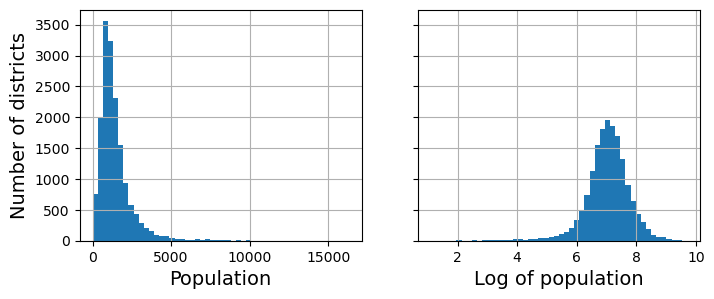

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")

plt.show()

还可以利用核函数来构造新的变量：

比如：对于多峰(多模态)的分布，可以通过度量输入值与某个特定模态的相似性来构造新的变量。

思路：  radial basis function + Gaussian

$exp(- \gamma (x-35)^2)$

In [76]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

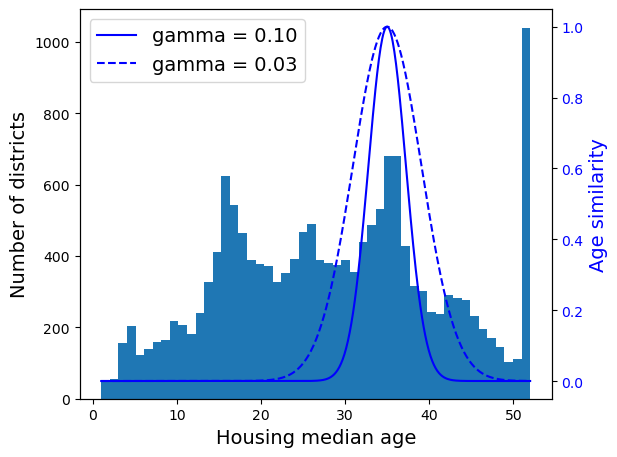

In [77]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

对label做了变换,模型拟合结束，输出预测结果后需要使用逆变换返回到原始label。

In [78]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [79]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

可以使用`TransformedTangetRegnessor`,自动复原label

In [80]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [81]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

## 定制变换函数

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - <font color=Blue>检查变量之间的相关性；</font>
  - <font color=Blue>尝试通过变量组合构造新的变量。</font>
- <font color=Blue>为机器学习算法准备数据；</font>
  - <font color=Blue>数据清理；</font>
  - <font color=Blue>处理文本和属性变量；</font>
  - <font color=Blue>特征归一化和标准化；</font>
  - <font color=Blue>定制变换函数；</font>
  - 建立变换流程。
- 选择模型并进行训练；
- 模型调优；
- 提出你的解决方案。

有些场景需要自己定制一些变换函数：

In [82]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [83]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

请注意，这里使用RBF核定制变换函数，没有逆函数。

因为RBF评估的是距离，相同距离下的点不是能唯一确定的。比如 1d 有两个点， 2d 是一个圈。

In [84]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

可以先确定一个固定点，用到固定点的距离设计特征。

In [85]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [86]:
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

定制的转换器对于组合不同变量也很有用，方便设计新的输入变量。

In [87]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

`FunctionTransformer`非常方便，但是如果你希望你的转换器是可训练的，在fit()中学习一些参数，然后稍后在transform（）中使用它们呢？为此，您需要编写一个自定义类。

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self) 
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

- `skleann.utils.validation` 包包含多个函数我们可以用来验证输入。
- Scikit-Learn 定制流程要求fit()函数具有两个参数X和y ，所以我们需要 y=None 参数。
- fit()必须返回 self 。

In [89]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

定制转换函数可以使用其他估计。例如，在fit()中使用 KMeans 聚类来识别训练数据中的聚类中心，
然后使用rbf_kernel在transform()中测量每个样本与每个样本的相似程度。

In [90]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [91]:
similarities[:3].round(2)

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

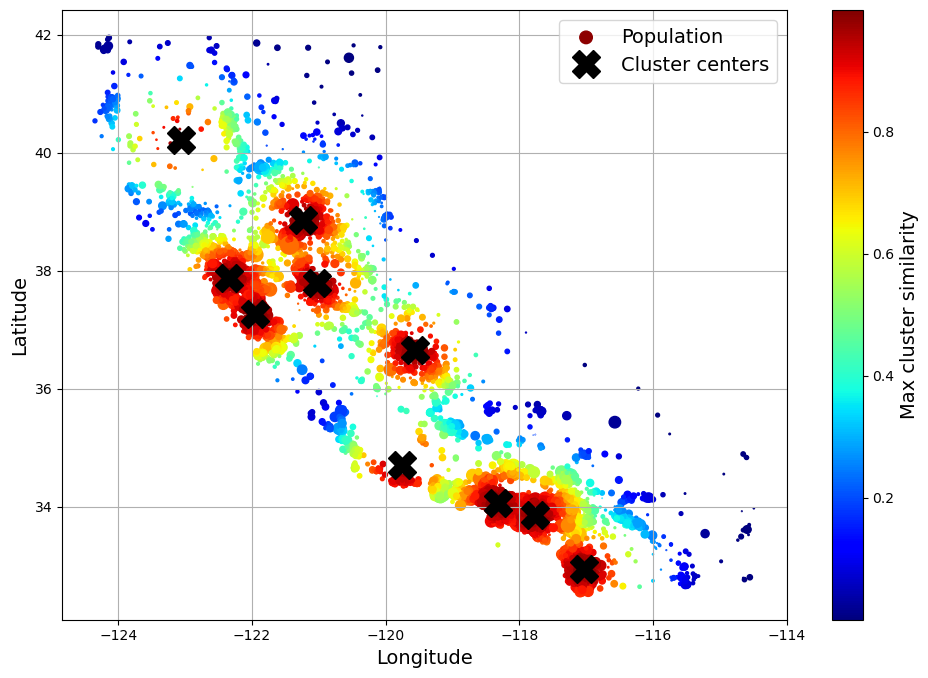

In [92]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

## 建立变换流程

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - <font color=Blue>检查变量之间的相关性；</font>
  - <font color=Blue>尝试通过变量组合构造新的变量。</font>
- <font color=Blue>为机器学习算法准备数据；</font>
  - <font color=Blue>数据清理；</font>
  - <font color=Blue>处理文本和属性变量；</font>
  - <font color=Blue>特征归一化和标准化；</font>
  - <font color=Blue>定制变换函数；</font>
  - <font color=Blue>建立变换流程。</font>
- 选择模型并进行训练；
- 模型调优；
- 提出你的解决方案。

在准备数据的过程中，有很多数据变换的过程需要以正确的顺序进行。因此我们可以把这些操作流程化(pipeline). `sklearn`提供了`Pipeline`类用于处理序列的变量变换过程。

In [93]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

构建流程的函数采用 名称/变换器 的2元组的列表定义一系列变换步骤。

\[ ( 名称，变换器)， （名称，变换器， ...）\]

- 名称可以是您喜欢的任何名称，只要它们是唯一的并且不包含双下划线 
- 变换器必须有fit_transform()

In [94]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

如果不想命名变换器，可以使用make_pipeline()函数.

In [95]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [96]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

如果想把变换后的数据转换成数据框的格式，可以使用`get_feature_names_out()`提取变换后变量的名字，然后复原出一个数据框。

In [97]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [98]:
df_housing_num_prepared.head(2) 

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096  -1.423037  1.013606            1.861119     0.311912        1.368167   
14973   0.596394 -0.702103            0.907630    -0.308620       -0.435925   

       population  households  median_income  
13096    0.137460    1.394812      -0.936491  
14973   -0.693771   -0.373485       1.171942

可以检查pipeline中所有的变换步骤：

In [99]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

pipeline支持用下标索引：

In [100]:
num_pipeline[1]

StandardScaler()

In [101]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

也可以使用变换的名字索引。如果你在建立pipeline时，对于每个变换步骤起了名字，用你起的名字进行索引。如果没有对每一步变换命名，make_pipeline会用变换器的名字的小写形式命名。

In [102]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

可以修改pipeline中某个变换步骤的参数：

In [103]:
num_pipeline.set_params(simpleimputer__strategy="mean")

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [104]:
num_pipeline.set_params(simpleimputer__strategy="constant",simpleimputer__fill_value=3)

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value=3, strategy='constant')),
                ('standardscaler', StandardScaler())])

我们已经处理了数值型变量的变换流程，同样的方法我们可以构造属性变量的变换流程。我们可以使用`ColumnTransformer`将用于数值变量和属性变量的变换放到一起。在变换训练数据时，`ColumnTransformer`会在我们定义的变量列表上对相应的变量进行变换。

In [105]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

列出所有变量的名字很不方便，尤其是预测变量很多时。
可以使用`make_column_selector()`函数来对输入变量进行自动的选择，选择出某种特定类型的输入变量。
再将选择的结果传给`make_column_transformer()`

In [106]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [107]:
housing_prepared = preprocessing.fit_transform(housing)

In [108]:

housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

pipeline-1__longitude  pipeline-1__latitude  \
13096              -1.423037              1.013606   
14973               0.596394             -0.702103   

       pipeline-1__housing_median_age  pipeline-1__total_rooms  \
13096                        1.861119                 0.311912   
14973                        0.907630                -0.308620   

       pipeline-1__total_bedrooms  pipeline-1__population  \
13096                    1.367911                0.137460   
14973                   -0.422241               -0.693771   

       pipeline-1__households  pipeline-1__median_income  \
13096                1.394812                  -0.936491   
14973               -0.373485                   1.171942   

       pipeline-2__ocean_proximity_<1H OCEAN  \
13096                                    0.0   
14973                                    1.0   

       pipeline-2__ocean_proximity_INLAND  pipeline-2__ocean_proximity_ISLAND  \
13096                                 0.0                                 0.0   
14973                                 0.0                                 0.0   

       pipeline-2__ocean_proximity_NEAR BAY  \
13096                                   1.0   
14973                                   0.0   

       pipeline-2__ocean_proximity_NEAR OCEAN  
13096                                     0.0  
14973                                     0.0

In [109]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)

# 作业：把这段code的每一句都写上注释。

In [110]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(16512, 24)

In [111]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# 5. 选择模型并进行训练

- <font color=Blue>了解问题的背景；</font>
- <font color=Blue>获取数据；</font>
- <font color=Blue>探索数据和可视化；</font>
- <font color=Blue>为机器学习算法准备数据；</font>
- <font color=Blue>选择模型并进行训练；</font>
- 模型调优；
- 提出你的解决方案。

## 训练和评估模型

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - <font color=Blue>检查变量之间的相关性；</font>
  - <font color=Blue>尝试通过变量组合构造新的变量。</font>
- <font color=Blue>为机器学习算法准备数据；</font>
  - <font color=Blue>数据清理；</font>
  - <font color=Blue>处理文本和属性变量；</font>
  - <font color=Blue>特征归一化和标准化；</font>
  - <font color=Blue>定制变换函数；</font>
  - <font color=Blue>建立变换流程。</font>
- <font color=Blue>选择模型并进行训练；</font>
  - <font color=Blue>训练和评估模型；</font>
  - 交叉验证。
- 模型调优；
- 提出你的解决方案。

考虑一个基础的线性模型：

In [112]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E32835B9D0>)])),
                ('linearregression', LinearRegression())])

进行预测并于真实值进行比较：

In [113]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # 保留到百位数

array([243700., 372400., 128800.,  94400., 328300.])

In [114]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

在最开始，我们选择了rmse作为衡量模型表现得指标：

In [115]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

68687.8917659008

我们再试一试决策树模型，看看效果怎么样：

In [116]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E32835B9D0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [117]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_rmse

0.0

## 交叉验证

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - <font color=Blue>检查变量之间的相关性；</font>
  - <font color=Blue>尝试通过变量组合构造新的变量。</font>
- <font color=Blue>为机器学习算法准备数据；</font>
  - <font color=Blue>数据清理；</font>
  - <font color=Blue>处理文本和属性变量；</font>
  - <font color=Blue>特征归一化和标准化；</font>
  - <font color=Blue>定制变换函数；</font>
  - <font color=Blue>建立变换流程。</font>
- <font color=Blue>选择一个模型并进行训练；</font>
  - <font color=Blue>训练和评估模型；</font>
  - <font color=Blue>交叉验证。</font>
- 模型调优；
- 提出你的解决方案。

In [118]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\clust

In [119]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66868.027288
std       2060.966425
min      63649.536493
25%      65338.078316
50%      66801.953094
75%      68229.934454
max      70094.778246
dtype: float64

In [120]:
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\clust

count       10.000000
mean     69858.018195
std       4182.205077
min      65397.780144
25%      68070.536263
50%      68619.737842
75%      69810.076342
max      80959.348171
dtype: float64

我们再试一个随机森林模型：

In [121]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\clust

In [122]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47019.561281
std       1033.957120
min      45458.112527
25%      46464.031184
50%      46967.596354
75%      47325.694987
max      49243.765795
dtype: float64

比较一下交叉验证得到validation error和训练数据集上得training error相差有多大：

In [123]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                                 squared=False)
forest_rmse

C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


17474.619286483998

validation error远大于training error，可能得原因：
- 过拟合：模型过拟合到训练样本上了；
- 分布偏移：验证集和训练集得分布不一样。

# 6. 模型调优

- <font color=Blue>了解问题的背景；</font>
- <font color=Blue>获取数据；</font>
- <font color=Blue>探索数据和可视化；</font>
- <font color=Blue>为机器学习算法准备数据；</font>
- <font color=Blue>选择模型并进行训练；</font>
- <font color=Blue>模型调优；</font>
- 提出你的解决方案。

常见的超参数包括：learning rate, batch size，dropout的比例 等优化算法相关的超参数；如神经网络模型的宽度、深度等模型相关的超参数；数据处理方案中的参数等。。。

## Grid Search

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - <font color=Blue>检查变量之间的相关性；</font>
  - <font color=Blue>尝试通过变量组合构造新的变量。</font>
- <font color=Blue>为机器学习算法准备数据；</font>
  - <font color=Blue>数据清理；</font>
  - <font color=Blue>处理文本和属性变量；</font>
  - <font color=Blue>特征归一化和标准化；</font>
  - <font color=Blue>定制变换函数；</font>
  - <font color=Blue>建立变换流程。</font>
- <font color=Blue>选择模型并进行训练；</font>
  - <font color=Blue>训练和评估模型；</font>
  - <font color=Blue>交叉验证。</font>
- <font color=Blue>模型调优；</font>
  - <font color=Blue>网格搜索；</font>
  - 随机搜索；
  - 分析最好的模型和它的误差；
  - 在测试集上评估模型。
- 提出你的解决方案。

In [125]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\clust

C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\clust

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001E32835B9D0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

- 这里在调优哪些超参数？
- 这些超参数都有哪些取值？
- 整个过程训练了几次模型？

您可以查看`full_pipeline.get_params().keys()`获取可用于调优的超参数的完整列表：

In [126]:
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__simpleimputer__verbose', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose'

找到最优的超参数组合：

In [127]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [128]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000001E...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E3283EB820>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

总共搜索了15组超参数的组合，每个组合下训练了3次：

In [129]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head(n=15)

n_clusters max_features  split0  split1  split2  mean_test_rmse
12         15            6   43460   43919   44748           44042
13         15            8   44132   44075   45010           44406
14         15           10   44374   44286   45316           44659
7          10            6   44683   44655   45657           44999
9          10            6   44683   44655   45657           44999
6          10            4   44557   44884   45831           45091
4           8            6   45201   44969   46102           45424
8          10            8   45192   45212   45993           45466
10         10            8   45192   45212   45993           45466
3           8            4   45281   45013   46319           45538
5           8            8   45509   45549   46307           45788
11         10           10   45553   45678   46206           45812
1           5            6   47354   47220   48499           47691
0           5            4   47412   47261   48853           47842
2           5            8   47485   47569   48581           47878

## 随机搜索

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - <font color=Blue>检查变量之间的相关性；</font>
  - <font color=Blue>尝试通过变量组合构造新的变量。</font>
- <font color=Blue>为机器学习算法准备数据；</font>
  - <font color=Blue>数据清理；</font>
  - <font color=Blue>处理文本和属性变量；</font>
  - <font color=Blue>特征归一化和标准化；</font>
  - <font color=Blue>定制变换函数；</font>
  - <font color=Blue>建立变换流程。</font>
- <font color=Blue>选择一个模型并进行训练；</font>
  - <font color=Blue>训练和评估模型；</font>
  - <font color=Blue>交叉验证。</font>
- <font color=Blue>模型调优；</font>
  - <font color=Blue>网格搜索；</font>
  - <font color=Blue>随机搜索；</font>
  - 分析最好的模型和它的误差；
  - 在测试集上评估模型。
- 提出你的解决方案。

当超参数个数或者超参数的可能取值比较多时（包括连续取值的超参数），超参数的组合会有很多。使用网格搜索遍历很难实现，因此选择随机搜索。

In [130]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

下面的例子试验了10组超参数的组合，每个组合重复了3遍。

In [131]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\clxie\anaconda3\lib\site-packages\sklearn\clust

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E3234154B0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E323417D00>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [133]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head(n=15)

n_clusters max_features  split0  split1  split2  mean_test_rmse
1         45            9   41287   42071   42627           41995
8         32            7   41690   42513   43224           42475
0         41           16   42223   42959   43321           42834
5         42            4   41818   43094   43817           42910
2         23            8   42264   42996   43830           43030
6         24            3   42693   43421   44441           43518
7         26           13   43097   43521   44175           43598
3         21           12   43721   43915   44543           44060
4         13            5   43902   43710   45087           44233
9          4            2   50364   49740   51560           50555

对于超参数分布的选择，可以考虑 `randint()`, `uniform()`, `geom()` and `expon()`, and `reciprocal()`等。

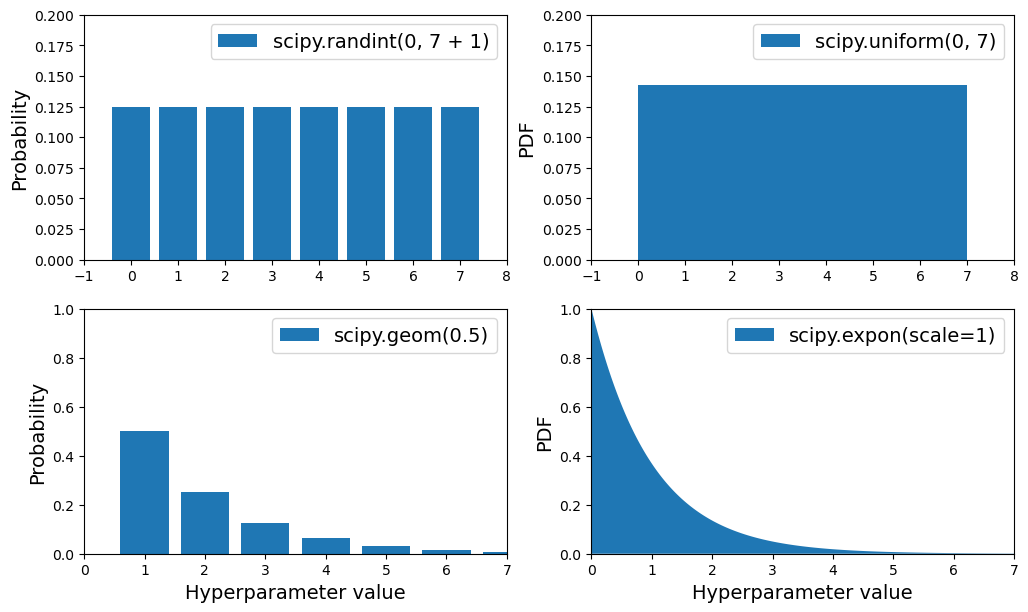

In [134]:
from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

## 分析最好的模型和它的误差：

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - <font color=Blue>检查变量之间的相关性；</font>
  - <font color=Blue>尝试通过变量组合构造新的变量。</font>
- <font color=Blue>为机器学习算法准备数据；</font>
  - <font color=Blue>数据清理；</font>
  - <font color=Blue>处理文本和属性变量；</font>
  - <font color=Blue>特征归一化和标准化；</font>
  - <font color=Blue>定制变换函数；</font>
  - <font color=Blue>建立变换流程。</font>
- <font color=Blue>选择一个模型并进行训练；</font>
  - <font color=Blue>训练和评估模型；</font>
  - <font color=Blue>交叉验证。</font>
- <font color=Blue>模型调优；</font>
  - <font color=Blue>网格搜索；</font>
  - <font color=Blue>随机搜索；</font>
  - <font color=Blue>分析最好的模型和它的误差；</font>
  - 在测试集上评估模型。
- 提出你的解决方案。

`RandomFonestRegressor` 可以分析各个输入变量对于提升预测准确率的贡献：

In [138]:
final_model = rnd_search.best_estimator_  
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.04, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.02, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.  , 0.02, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

In [139]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.18694559869103852, 'log__median_income'),
 (0.0748194905715524, 'cat__ocean_proximity_INLAND'),
 (0.06926417748515576, 'bedrooms__ratio'),
 (0.05446998753775219, 'rooms_per_house__ratio'),
 (0.05262301809680712, 'people_per_house__ratio'),
 (0.03819415873915732, 'geo__Cluster 0 similarity'),
 (0.02879263999929514, 'geo__Cluster 28 similarity'),
 (0.023530192521380392, 'geo__Cluster 24 similarity'),
 (0.020544786346378206, 'geo__Cluster 27 similarity'),
 (0.019873052631077512, 'geo__Cluster 43 similarity'),
 (0.018597511022930273, 'geo__Cluster 34 similarity'),
 (0.017409085415656868, 'geo__Cluster 37 similarity'),
 (0.015546519677632162, 'geo__Cluster 20 similarity'),
 (0.014230331127504292, 'geo__Cluster 17 similarity'),
 (0.0141032216204026, 'geo__Cluster 39 similarity'),
 (0.014065768027447325, 'geo__Cluster 9 similarity'),
 (0.01354220782825315, 'geo__Cluster 4 similarity'),
 (0.013489636258229071, 'geo__Cluster 3 similarity'),
 (0.013383196263838682, 'geo__Cluster 38 similarit

## 在测试集上评估模型

- <font color=Blue>了解问题的背景；</font>
  - <font color=Blue>确定这个问题的目标；</font>
  - <font color=Blue>选择合理的指标来衡量模型性能；</font>
  - <font color=Blue>检查这个问题的假设条件。</font>
- <font color=Blue>获取数据；</font>
  - <font color=Blue>下载数据；</font>
  - <font color=Blue>快速浏览数据结构；</font>
  - <font color=Blue>创建测试集。</font>
- <font color=Blue>探索数据和可视化；</font>
  - <font color=Blue>将地理数据可视化；</font>
  - <font color=Blue>检查变量之间的相关性；</font>
  - <font color=Blue>尝试通过变量组合构造新的变量。</font>
- <font color=Blue>为机器学习算法准备数据；</font>
  - <font color=Blue>数据清理；</font>
  - <font color=Blue>处理文本和属性变量；</font>
  - <font color=Blue>特征归一化和标准化；</font>
  - <font color=Blue>定制变换函数；</font>
  - <font color=Blue>建立变换流程。</font>
- <font color=Blue>选择一个模型并进行训练；</font>
  - <font color=Blue>训练和评估模型；</font>
  - <font color=Blue>交叉验证。</font>
- <font color=Blue>模型调优；</font>
  - <font color=Blue>网格搜索；</font>
  - <font color=Blue>随机搜索；</font>
  - <font color=Blue>分析最好的模型和它的误差；</font>
  - <font color=Blue>在测试集上评估模型。</font>
- 提出你的解决方案。

In [140]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

41424.40026462184


计算rmse的95%置信区间（例子中根据t分布，也可以用标准正态近似）：

In [141]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39275.40861216, 43467.27680583])

## 提出你的解决方案

- <font color=Blue>了解问题的背景；</font>
- <font color=Blue>获取数据；</font>
- <font color=Blue>探索数据和可视化；</font>
- <font color=Blue>为机器学习算法准备数据；</font>
- <font color=Blue>选择一个模型并进行训练；</font>
- <font color=Blue>模型调优；</font>
- <font color=Blue>提出你的解决方案。</font>

存储模型和调用模型：

In [142]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

一旦你的模型开始上线使用，需要保证可以加载并调用它。
为此，必须首先导入模型中的任何自定义类和函数依赖，然后加载模型并用它来进行预测：

In [145]:
import joblib

from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [146]:
predictions

array([442737.15, 457566.06, 105965.  ,  98462.  , 332992.01])